In [2]:
import pandas as pd
import numpy as np

# seleksi baris dengan query

In [5]:
df = pd.DataFrame({
    'col1': [1,22,3,53,64],
    'col 2': [34,32,1,5,44]
})
df

,col1,col 2
0,1,34
1,22,32
2,3,1
3,53,5
4,64,44


In [9]:
df.query('col1 == 3')

,col1,col 2
2,3,1


In [7]:
#in case jika nama kolom pakai spasi
df.query('`col 2` > 30')

,col1,col 2
0,1,34
1,22,32
4,64,44


# pengaturan tampilan

In [4]:
df2 = pd.read_csv('dataset/titanicfull.csv')

In [7]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 50)

df2

,pclass,survived,name,sex,age,...,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,...,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,...,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,...,0,2670,7.2250,NaN,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.00,...,0,315082,7.8750,NaN,S


In [8]:
#reset
pd.reset_option('^display.', silent=True)

In [9]:
df2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


# Fungsi agregasi first dan last 

In [11]:
df3 = pd.DataFrame({
    'dokter': ['Sina', 'Maria', 'Sina', 'Maria', 'Rose'],
    'pasien': ['Dadang', 'Asep', 'Niko', 'Marlo', 'Polo']
})
df3

,dokter,pasien
0,Sina,Dadang
1,Maria,Asep
2,Sina,Niko
3,Maria,Marlo
4,Rose,Polo


In [13]:
 df3.groupby('dokter')['pasien'].count().to_frame()

,pasien
dokter,
Maria,2
Rose,1
Sina,2


In [14]:
 df3.groupby('dokter')['pasien'].first().to_frame() #pasien pertama

,pasien
dokter,
Maria,Asep
Rose,Polo
Sina,Dadang


In [15]:
 df3.groupby('dokter')['pasien'].last().to_frame() #pasien terakhir

,pasien
dokter,
Maria,Marlo
Rose,Polo
Sina,Niko


# explode dan implode

In [16]:
d = {
    'Team': ['DC', 'Marvel'],
    'Heroes': [
                ['Batman', 'Superman', 'Wonder Woman', 'Green Lantern', 'Aquaman', 'Shazam'],
                ['IronMan', 'Hulk', 'Thor', 'Black Widow', 'Black Panter', 'Ant Man']
              ]
}

df4 = pd.DataFrame(d)
df4

,Team,Heroes
0,DC,"[Batman, Superman, Wonder Woman, Green Lantern..."
1,Marvel,"[IronMan, Hulk, Thor, Black Widow, Black Pante..."


In [17]:
df4_ex = df4.explode('Heroes')
df4_ex

,Team,Heroes
0,DC,Batman
0,DC,Superman
0,DC,Wonder Woman
0,DC,Green Lantern
0,DC,Aquaman
0,DC,Shazam
1,Marvel,IronMan
1,Marvel,Hulk
1,Marvel,Thor
1,Marvel,Black Widow


In [18]:
d = {
    'Team': ['DC', 'Marvel']}
df4_2 = pd.DataFrame(d)
df4_2

,Team
0,DC
1,Marvel


In [19]:
df4_2['Imploded'] = df4_ex.groupby(df4_ex.index)['Heroes'].agg(list)
df4_2

,Team,Imploded
0,DC,"[Batman, Superman, Wonder Woman, Green Lantern..."
1,Marvel,"[IronMan, Hulk, Thor, Black Widow, Black Pante..."


In [20]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df5 = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns=cols)
df5

,A,B,C,D,E
0,14,4,5,9,4
1,7,8,16,18,8
2,6,13,15,2,13
3,6,14,18,14,16
4,14,7,18,19,16


# akses nilai variabel dalam query

In [22]:
df5.query('A >= 7')

,A,B,C,D,E
0,14,4,5,9,4
1,7,8,16,18,8
4,14,7,18,19,16


In [24]:
rata2 = df5['A'].mean()
rata2

9.4

In [25]:
df5.query('A > @rata2')

,A,B,C,D,E
0,14,4,5,9,4
4,14,7,18,19,16


# tipe data ordinal

In [26]:
d2 = {
    'pelanggan': [1,4,6,7,8],
    'kepuasan': ['buruk','cukup','cukup','baik','sangat baik']
}
df6 = pd.DataFrame(d2)
df6

,pelanggan,kepuasan
0,1,buruk
1,4,cukup
2,6,cukup
3,7,baik
4,8,sangat baik


In [27]:
from pandas.api.types import CategoricalDtype

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'], ordered=True)

df6['kepuasan'] = df6['kepuasan'].astype(tingkat_kepuasan)

In [28]:
df6 = df6.sort_values('kepuasan', ascending=True)
df6

,pelanggan,kepuasan
0,1,buruk
1,4,cukup
2,6,cukup
3,7,baik
4,8,sangat baik


In [29]:
df6[df6['kepuasan'] > 'cukup']

,pelanggan,kepuasan
3,7,baik
4,8,sangat baik


# visualisasi data tanpa matloblib

In [32]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df7 = pd.DataFrame(np.random.randint(1,20, size=(n_rows, n_cols)), columns=cols)
df7.head()

,A,B,C,D,E
0,19,17,7,6,13
1,6,13,12,15,10
2,4,15,17,9,17
3,3,14,18,5,17
4,12,12,15,19,14


<AxesSubplot:>

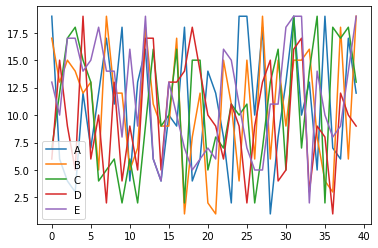

In [33]:
df7.plot(kind='line')

<AxesSubplot:>

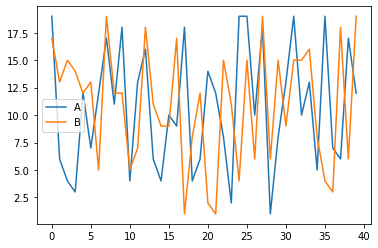

In [34]:
df7[['A','B']].plot(kind='line')

<AxesSubplot:>

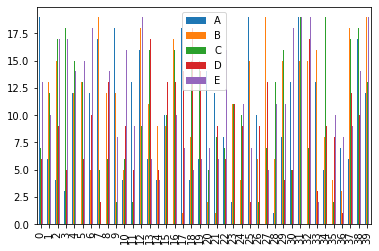

In [35]:
df7.plot(kind='bar')

<AxesSubplot:>

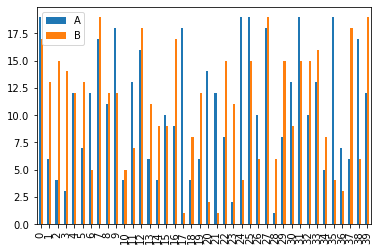

In [36]:
df7[['A','B']].plot(kind='bar')

<AxesSubplot:>

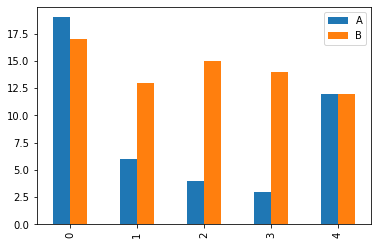

In [37]:
df7[['A','B']].head().plot(kind='bar')

<AxesSubplot:>

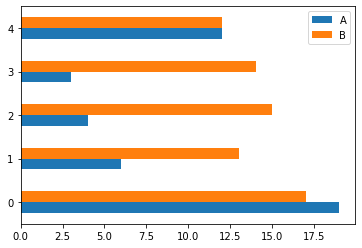

In [38]:
df7[['A','B']].head().plot(kind='barh')

<AxesSubplot:>

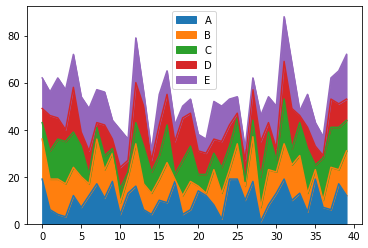

In [39]:
df7.plot(kind='area')

<AxesSubplot:>

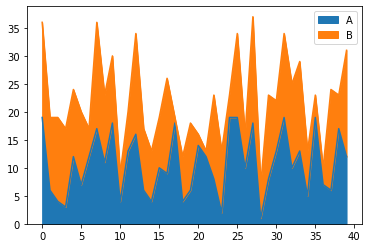

In [40]:
df7[['A','B']].plot(kind='area')

<AxesSubplot:>

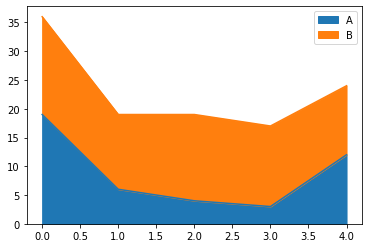

In [41]:
df7[['A','B']].head().plot(kind='area')

<AxesSubplot:>

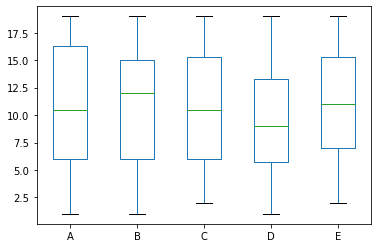

In [42]:
df7.plot(kind='box')

<AxesSubplot:>

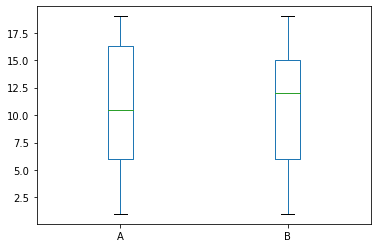

In [43]:
df7[['A','B']].plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

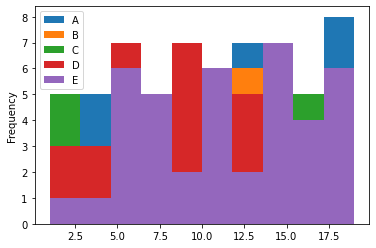

In [47]:
df7.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

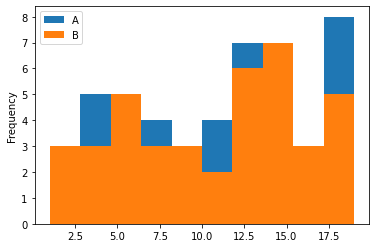

In [48]:
df7[['A','B']].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

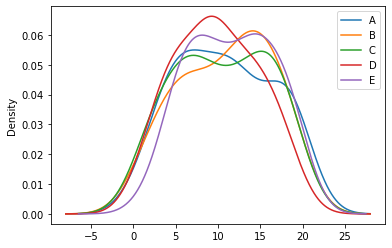

In [49]:
df7.plot(kind='kde') #kernel density estimation

<AxesSubplot:xlabel='A', ylabel='B'>

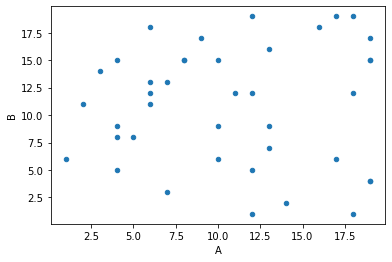

In [50]:
df7.plot(x='A', y='B', kind='scatter') #melihat korelasi